# Loading Labraries

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

In [ ]:
data_dir = 'C:\\Users\\Ali Ahmad\\.cache\\kagglehub\\datasets\\uciml\\sms-spam-collection-dataset\\versions\\1'

In [ ]:
os.listdir(data_dir)

In [181]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [182]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


- **Most of the values in the columns 3,4 and 5 are missing so we delete them** 

In [184]:
df1 = df[['v1','v2']]

In [185]:
df1.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [186]:
df1 = df1.rename(columns = {'v1':'target','v2':'text'})

In [187]:
df1.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
encoder = LabelEncoder()

In [190]:
df1['target'] = encoder.fit_transform(df1['target'])

In [191]:
df1.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [192]:
df1.isnull().sum()

target    0
text      0
dtype: int64

In [193]:
df1.duplicated().sum()

403

In [194]:
df1 = df1.drop_duplicates(keep='first')

# EDA

In [195]:
df1['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [196]:
import matplotlib.pyplot as plt

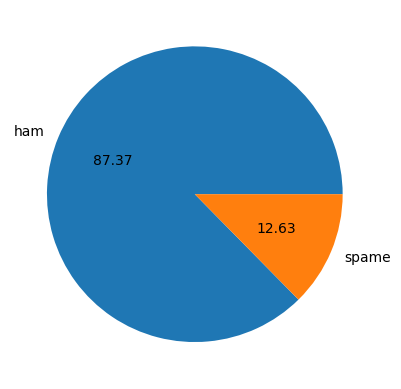

In [197]:
plt.pie(df1['target'].value_counts(),labels = ['ham','spame'],autopct = '%0.2f')
plt.show()

**Data is imblanced**

In [198]:
import nltk 
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Ali
[nltk_data]     Ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [199]:
df1['num_character'] = df1['text'].apply(len)

In [200]:
df1.head(2)

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [201]:
df1['num_words'] = df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [202]:
df1['num_sentences'] = df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [203]:
df1.head(3)

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [204]:
df1.columns

Index(['target', 'text', 'num_character', 'num_words', 'num_sentences'], dtype='object')

In [205]:
df1[['num_character', 'num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [206]:
df1[df1['target'] == 1][['num_character', 'num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [207]:
df1[df1['target'] == 0][['num_character', 'num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [208]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

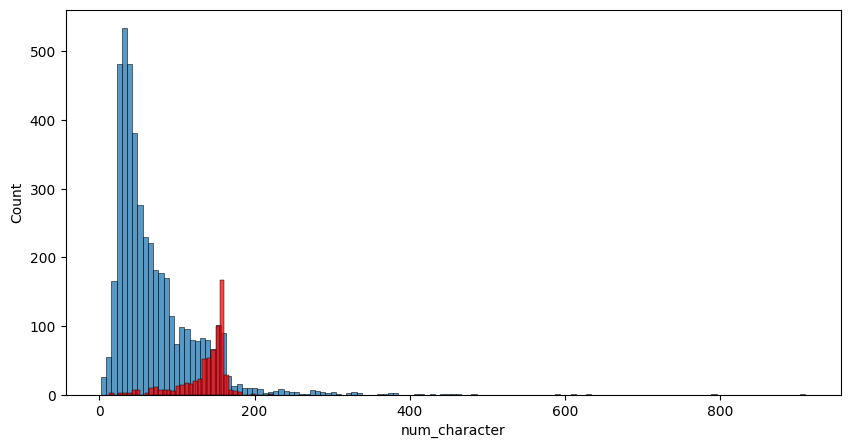

In [209]:
plt.figure(figsize=(10,5))
sns.histplot(df1[df1['target'] == 0]['num_character'])
sns.histplot(df1[df1['target'] == 1]['num_character'],color = 'red')

- ON an average most of the spam message has more number of characters than ham messages

<Axes: xlabel='num_words', ylabel='Count'>

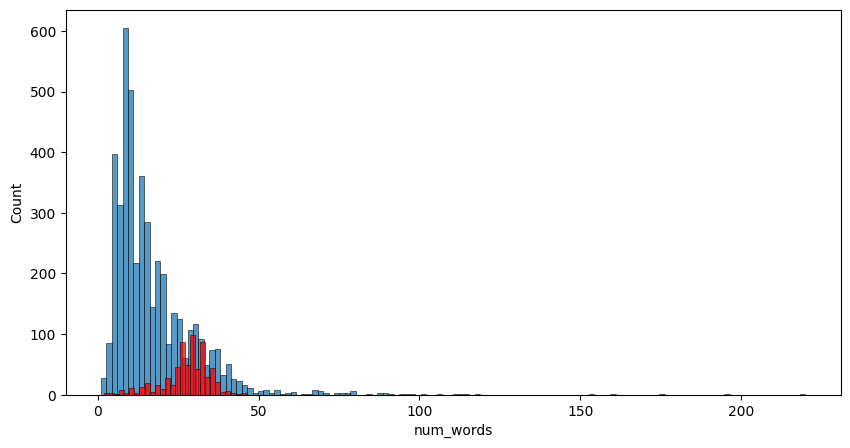

In [210]:
plt.figure(figsize=(10,5))
sns.histplot(df1[df1['target'] == 0]['num_words'])
sns.histplot(df1[df1['target'] == 1]['num_words'],color = 'red')

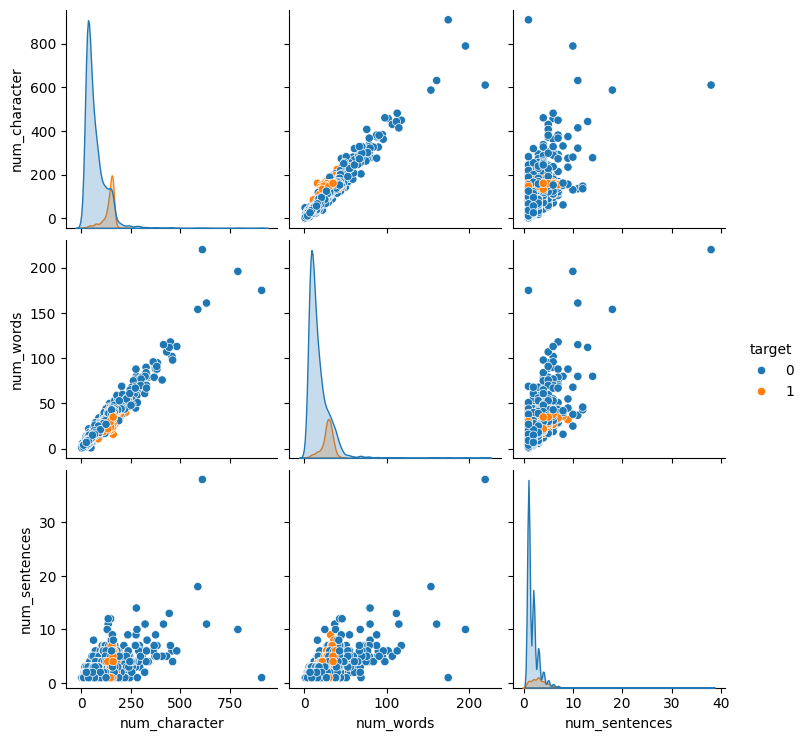

In [211]:
sns.pairplot(df1,hue = 'target')

In [212]:
corr = df1[['target','num_character','num_words','num_sentences']].corr()
corr

,target,num_character,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

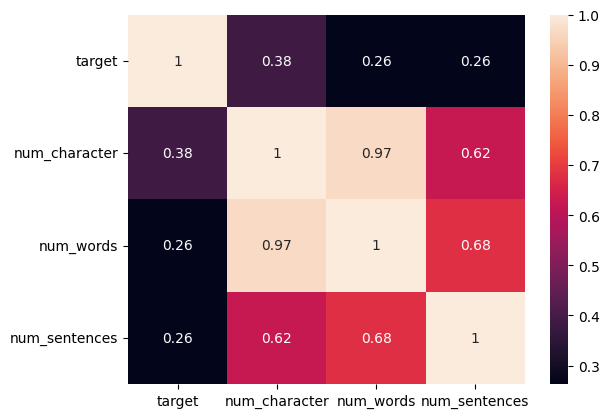

In [213]:
sns.heatmap(corr,annot = True)

## Data Preprocessing/Text preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [214]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
        
    return " ".join(y)

In [215]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [216]:
df1['transform_text'] = df1['text'].apply(transform_text)

### Now we make wordcloud:
- world cloud basically take common words from both category.

In [217]:
from wordcloud import WordCloud
wc = WordCloud(width = 600, height = 500, min_font_size = 10, background_color = 'white')

In [218]:
spam_wc = wc.generate(df1[df1['target'] == 1]['transform_text'].str.cat(sep=" "))


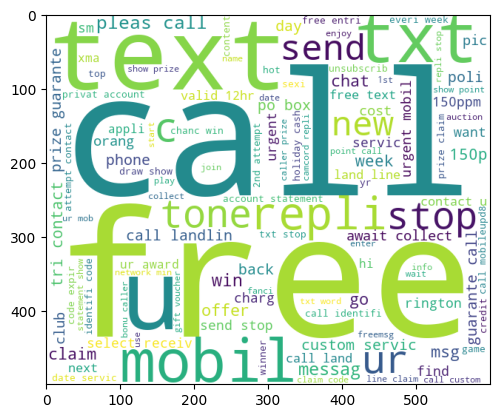

In [219]:
plt.imshow(spam_wc)
plt.show()

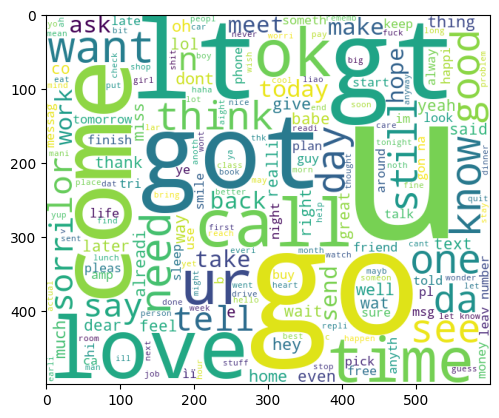

In [220]:
ham_wc = wc.generate(df1[df1['target'] == 0]['transform_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

- Now we take top 30 words from both category `ham` and `spam`
- 

In [221]:
df1.head(3)

,target,text,num_character,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [222]:
spam_corpus = []
for msg in df1[df1['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [223]:
from collections import Counter
spam_top_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [224]:
spam_top_words

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [225]:
ham_corpus = []
for msg in df1[df1['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [226]:

pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [227]:
len(ham_corpus)

35404

## Text Vectorization

In [268]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [269]:
X_cv = cv.fit_transform(df1['transform_text']).toarray()
X_tfidf = tfidf.fit_transform(df1['transform_text']).toarray()

In [270]:
y = df1['target']

## Train_test_split

In [271]:
from sklearn.model_selection import train_test_split

In [258]:
X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(X_cv,y,test_size = 0.2,random_state = 2)

In [272]:
X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(X_tfidf,y,test_size = 0.2,random_state = 2)

# Model Building

## CountVectorizer

In [273]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [274]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [260]:
gnb.fit(X_train_cv,y_train_cv)
y_pred1 = gnb.predict(X_test_cv)
print(accuracy_score(y_test_cv,y_pred1))
print(confusion_matrix(y_test_cv,y_pred1))
print(precision_score(y_test_cv,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [275]:
mnb.fit(X_train_cv,y_train_cv)
y_pred2 = mnb.predict(X_test_cv)
print(accuracy_score(y_test_cv,y_pred2))
print(confusion_matrix(y_test_cv,y_pred2))
print(precision_score(y_test_cv,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [262]:
bnb.fit(X_train_cv,y_train_cv)
y_pred3 = bnb.predict(X_test_cv)
print(accuracy_score(y_test_cv,y_pred3))
print(confusion_matrix(y_test_cv,y_pred3))
print(precision_score(y_test_cv,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## TFIDF

In [264]:
gnb.fit(X_train_tfidf,y_train_tfidf)
y_pred1 = gnb.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred1))
print(confusion_matrix(y_test_tfidf,y_pred1))
print(precision_score(y_test_tfidf,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [265]:
mnb.fit(X_train_tfidf,y_train_tfidf)
y_pred2 = mnb.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred2))
print(confusion_matrix(y_test_tfidf,y_pred2))
print(precision_score(y_test_tfidf,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [266]:
bnb.fit(X_train_tfidf,y_train_tfidf)
y_pred3 = bnb.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred3))
print(confusion_matrix(y_test_tfidf,y_pred3))
print(precision_score(y_test_tfidf,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## Other Algorithems

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [243]:
svc = SVC(kernel= 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bc = BaggingClassifier(n_estimators = 50,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)


In [244]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'ETC':etc,
    'Bgc':bc,
    'GDDt':gbdt
}

In [245]:
def train_classifier(clf,X_train,X_test,y_test,y_train):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precisions_score = precision_score(y_test,y_pred)

    return accuracy,precisions_score

In [246]:
train_classifier(svc,X_train_tfidf,X_test_tfidf,y_test_tfidf,y_train_tfidf)

(0.9729206963249516, 0.9741379310344828)

In [250]:

accuracies = []
precisions = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, X_test, y_test, y_train)
    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)

    accuracies.append(current_accuracy)
    precisions.append(current_precision)


For SVC
Accuracy: 0.9264990328820116
Precision: 0.7421875
For KN
Accuracy: 0.9061895551257253
Precision: 1.0
For NB
Accuracy: 0.9642166344294004
Precision: 0.8344370860927153
For DT
Accuracy: 0.9264990328820116
Precision: 0.9428571428571428
For LR
Accuracy: 0.9709864603481625
Precision: 0.9736842105263158
For RF
Accuracy: 0.971953578336557
Precision: 1.0
For AdaBoost
Accuracy: 0.9197292069632496
Precision: 0.9365079365079365
For ETC
Accuracy: 0.97678916827853
Precision: 0.9913793103448276
For Bgc
Accuracy: 0.9622823984526112
Precision: 0.9159663865546218
For GDDt
Accuracy: 0.9439071566731141
Precision: 0.9444444444444444


In [252]:
performance_df = pd.DataFrame({'Algorithem':clfs.keys(),'Accuracy':accuracies,'Precision':precisions}).sort_values('Accuracy',ascending = False)

In [253]:
performance_df

,Algorithem,Accuracy,Precision
7,ETC,0.976789,0.991379
5,RF,0.971954,1.000000
4,LR,0.970986,0.973684
2,NB,0.964217,0.834437
8,Bgc,0.962282,0.915966
9,GDDt,0.943907,0.944444
0,SVC,0.926499,0.742188
3,DT,0.926499,0.942857
6,AdaBoost,0.919729,0.936508
1,KN,0.906190,1.000000


In [267]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))